# Cartopy

- [Introduction](#sect-intro)
- [Creating Simple Maps](#sect-simple)
- [Projections](#sect-proj)
- [Transform](#sect-trans)
- [Cartopy Features](#sect-feat)
- [Adding Text](#sect-text)
- [Gridlines and Tick Labels](#sect-grid)
- [Custom Boundary Shapes](#sect-cust)
- [Plotting Data](#sect-data)
- [Contour Plots](#sect-contour)
- [Images](#sect-img)

<a id="sect-intro"></a>
## Introduction

The `cartopy.crs.CRS` class is the very core of cartopy, all coordinate reference systems in cartopy have `CRS` as a parent class, meaning all projections have the interface described below.

#### *class* `cartopy.crs.CRS(proj4_params, globe=None)`

Define a Coordinate Reference System using proj.

`globe` The Globe instance of this CRS.

`as_geocentric()` Return a new Geocentric CRS with the same ellipse/datum as this CRS.

`as_geodetic()` Return a new Geodetic CRS with the same ellipse/datum as this CRS.

`transform_point(x, y, src_crs)` Transform the given float64 coordinate pair, in the given source coordinate system (src_crs), to this coordinate system.

Parameters:

* x – the x coordinate, in src_crs coordinates, to transform
* y – the y coordinate, in src_crs coordinates, to transform
* src_crs – instance of CRS that represents the coordinate system of x and y.
* trap – Whether proj errors for “latitude or longitude exceeded limits” and “tolerance condition error” should be trapped.

Returns: (x, y) in this coordinate system

`transform_points(src_crs, x, y[, z])` Transform the given coordinates, in the given source coordinate system (src_crs), to this coordinate system.

Parameters:
* src_crs – instance of CRS that represents the coordinate system of x, y and z.
* x – the x coordinates (array), in src_crs coordinates, to transform. May be 1 or 2 dimensional.
* y – the y coordinates (array), in src_crs coordinates, to transform. Its shape must match that of x.
* z (optional) – the z coordinates (array), in src_crs coordinates, to transform. Defaults to None. If supplied, its shape must match that of x.
* trap – Whether proj errors for “latitude or longitude exceeded limits” and “tolerance condition error” should be trapped.

Returns: Array of shape x.shape + (3, ) in this coordinate system.

`transform_vectors(src_proj, x, y, u, v)` Transform the given vector components, with coordinates in the given source coordinate system (src_proj), to this coordinate system. The vector components must be given relative to the source projection’s coordinate reference system (grid eastward and grid northward). x, y, u and v may be 1 or 2 dimensional, but must all have matching shapes. The algorithm used to transform vectors is an approximation rather than an exact transform, but the accuracy should be good enough for visualization purposes.

Parameters: 
* src_proj – The CRS.Projection that represents the coordinate system the vectors are defined in.
* x – The x coordinates of the vectors in the source projection.
* y – The y coordinates of the vectors in the source projection.
* u – The grid-eastward components of the vectors.
* v – The grid-northward components of the vectors.

Returns: ut, vt (The transformed vector components.)

The Globe class is used to encapsulate the underlying sphere or ellipsoid of any cartopy CRS. All CRSs have an associated Globe, though often it is just the default Globe which represents the reference ellipsoid (i.e. “wgs84”).

#### *class* `cartopy.crs.Globe(datum=None, ellipse='WGS84', semimajor_axis=None, semiminor_axis=None, flattening=None, inverse_flattening=None, towgs84=None, nadgrids=None)` 

Define an ellipsoid and, optionally, how to relate it to the real world.

The most common CRS subclass is itself another abstract class; the cartopy.crs.Projection class represents a 2 dimensional coordinate system which could be drawn directly as a map (i.e. on a flat piece of paper). Projection is the parent class of all projections in the PlateCarree.

`__init__(datum=None, ellipse='WGS84', semimajor_axis=None, semiminor_axis=None, flattening=None, inverse_flattening=None, towgs84=None, nadgrids=None)`

Parameters:
* datum – Proj “datum” definition. Defaults to None.
* ellipse – Proj “ellps” definition. Defaults to ‘WGS84’.
* semimajor_axis – Semimajor axis of the spheroid / ellipsoid. Defaults to None.
* semiminor_axis – Semiminor axis of the ellipsoid. Defaults to None.
* flattening – Flattening of the ellipsoid. Defaults to None.
* inverse_flattening – Inverse flattening of the ellipsoid. Defaults to None.
* towgs84 – Passed through to the Proj definition. Defaults to None.
* nadgrids – Passed through to the Proj definition. Defaults to None.

#### *class* `cartopy.crs.Projection(*args, **kwargs)`
Define a projected coordinate system with flat topology and Euclidean distance.

`project_geometry(geometry, src_crs=None)`
Project the given geometry into this projection.

Parameters:

* geometry – The geometry to (re-)project.
* src_crs (optional) – The source CRS. Defaults to None. If src_crs is None, the source CRS is assumed to be a geodetic version of the target CRS.

Returns: geometry – The projected result (a shapely geometry).

`quick_vertices_transform(vertices, src_crs)` 
Where possible, return a vertices array transformed to this CRS from the given vertices array of shape (n, 2) and the source CRS. 
This method may return None to indicate that the vertices cannot be transformed quickly, and a more complex geometry transformation is required (see cartopy.crs.Projection.project_geometry()).

There are a few non-Projection subclasses. These represent coordinate reference systems which are 3 dimensional and could not be drawn directly on a piece of paper.

#### *class* `cartopy.crs.Geodetic(globe=None)` 
Define a latitude/longitude coordinate system with spherical topology, geographical distance and coordinates are measured in degrees.

#### *class* `cartopy.crs.Geocentric(globe=None)` 
Define a Geocentric coordinate system, where x, y, z are Cartesian coordinates from the center of the Earth.

#### *class* `cartopy.crs.RotatedGeodetic(pole_longitude, pole_latitude, central_rotated_longitude=0.0, globe=None)` 
Define a rotated latitude/longitude coordinate system with spherical topology and geographical distance. Coordinates are measured in degrees. 

The class uses proj to perform an ob_tran operation, using the pole_longitude to set a lon_0 then performing two rotations based on pole_latitude and central_rotated_longitude. This is equivalent to setting the new pole to a location defined by the pole_latitude and pole_longitude values in the GeogCRS defined by globe, then rotating this new CRS about it’s pole using the central_rotated_longitude value.

There is also a function for calling epsg.io with a specified code, returning the corresponding cartopy projection, see below.

#### `cartopy.crs.epsg(code)`
Return the projection which corresponds to the given EPSG code. The EPSG code must correspond to a “projected coordinate system”, so EPSG codes such as 4326 (WGS-84) which define a “geodetic coordinate system” will not work. The conversion is performed by pyproj.CRS.

<a id="sect-simple"></a>
## Creating Simple Maps
Cartopy has exposed an interface to enable easy map creation using matplotlib. Creating a basic map is as simple as telling Matplotlib to use a specific map projection, and then adding some coastlines to the axes.

The line `plt.axes(projection=ccrs.PlateCarree())` sets up a GeoAxes instance which exposes a variety of other map related methods, in the case of this example, we used the `coastlines()` method to add coastlines to the map.

To save the figure, use Matplotlib’s `savefig()` function.

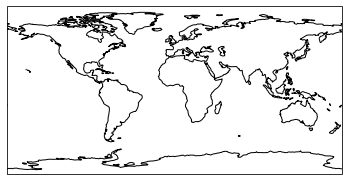

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('coastlines.pdf')
plt.savefig('coastlines.png')

plt.show()

<a id="sect-proj"></a>
## Projections
The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like).

Lets create another map in a different projection, and make use of the `stock_img()` method to add an underlay image to the map:

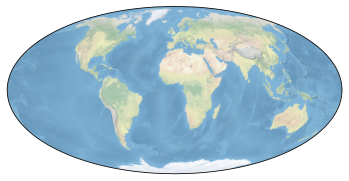

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

Listing the projections we could use:
* PlateCarree
* AlbersEqualArea
* AzimuthalEquidistant
* EquidistantConic
* LambertConformal
* LambertCylindrical
* Mercator
* Miller
* Mollweide
* Orthographic
* Robinson
* Sinusoidal
* Stereographic
* TransverseMercator
* UTM
* InterruptedGoodeHomolosine
* RotatedPole
* OSGB
* EuroPP
* Geostationary
* NearsidePerspective
* EckertI
* EckertII
* EckertIII
* EckertIV
* EckertV
* EckertVI
* EqualEarth
* Gnomonic
* LambertAzimuthalEqualArea
* NorthPolarStereo
* OSNI
* SouthPolarStereo

<a id="sect-trans"></a>
## Transform
The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.

Let's make an example of how this can be used with some made-up data. First, we make a PlateCarree projection without specifying the transform argument. This happens to work, correctly displaying the data due to the supplied coordinate system matching the projection. 

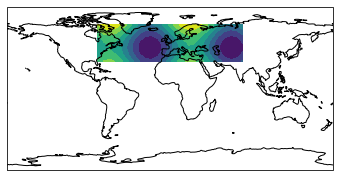

In [3]:
import numpy as np


lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)


import cartopy.crs as ccrs
import matplotlib.pyplot as plt


# The projection keyword determines how the plot will look

plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, but looks ok
plt.show()

Correctly using the transform keyword:

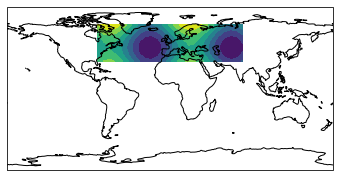

In [4]:
data_crs = ccrs.PlateCarree()

# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data, transform=data_crs)
plt.show()

When this doesn't work out, we may see something like the example below:

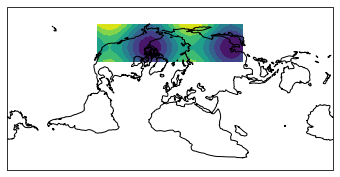

In [5]:
# Now we plot a rotated pole projection
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, uh oh
plt.show()

To fix this, we supply the transform argument. 

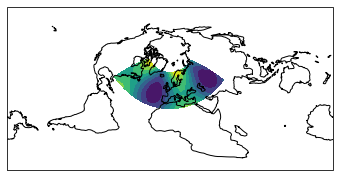

In [6]:
# A rotated pole projection again...
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# ...but now using the transform argument
ax.contourf(lon, lat, data, transform=data_crs)
plt.show()

Here's another example which compares Geodetic and Plate Carree lines between two locations.

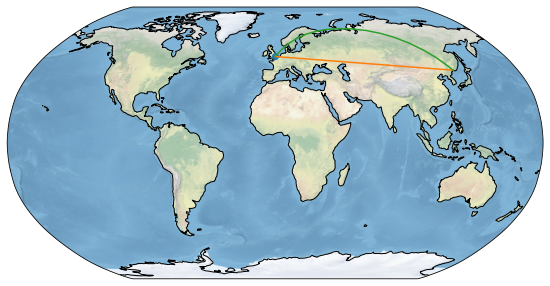

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()

    ax.stock_img()
    ax.coastlines()

    ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

    plt.show()


if __name__ == '__main__':
    main()

<a id="sect-feat"></a>
## Cartopy Features

Feature subclasses have been defined for common functionality, such as accessing Natural Earth or GSHHS shapefiles. 

To simplify some very common cases, some pre-defined Features exist as `cartopy.feature` constants. The pre-defined Features are all small-scale (1:110m) Natural Earth datasets, and can be added with methods such as `GeoAxes.add_feature`:

BORDERS - Country boundaries.

COASTLINE - Coastline, including major islands.

LAKES - Natural and artificial lakes.

LAND - Land polygons, including major islands.

OCEAN - Ocean polygons.

RIVERS - Single-line drainages, including lake centerlines.

STATES - Internal, first-order administrative boundaries (limited to the United States at this scale). Natural Earth have first-order admin boundaries for most countries at the 1:10,000,000 scale; these may be accessed with cartopy.feature.STATES.with_scale('10m')


Any Natural Earth dataset can be used by creating an instance of `cartopy.feature.NaturalEarthFeature`. For example:

In [8]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

A dictionary of some useful colors for drawing features also exists in `cartopy.feature.COLORS`.

For a full list of names in this dictionary:

In [9]:
import cartopy.feature
print(sorted(cartopy.feature.COLORS.keys()))

['land', 'land_alt1', 'water']


`add_feature(feature, **kwargs)`
Add the given Feature instance to the axes.

Parameters : `feature` – An instance of Feature.

Returns: A `cartopy.mpl.feature_artist.FeatureArtist` instance – The instance responsible for drawing the feature.

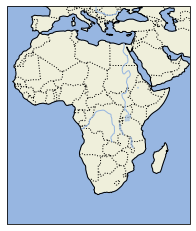

In [10]:
import cartopy
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-20, 60, -40, 40])

plt.show()

Another example of feature creation on a map is shown below. 

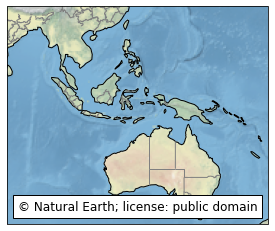

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

# Add a text annotation for the license information to the
# the bottom right corner.
text = AnchoredText('\u00A9 {}; license: {}'
                    ''.format(SOURCE, LICENSE),
                    loc=4, prop={'size': 12}, frameon=True)
ax.add_artist(text)

plt.show()

<a id="sect-text"></a>
# Adding Text

A benefit of the example above is that it also demonstrates a way to add text to the map using `AnchoredText`. 

#### *class* `matplotlib.offsetbox.AnchoredText(s, loc, pad=0.4, borderpad=0.5, prop=None, **kwargs)`

Bases: matplotlib.offsetbox.AnchoredOffsetbox

AnchoredOffsetbox with Text.

Parameters:
- sstr - Text.
- locstr - Location code. See AnchoredOffsetbox.
- pad - float, default: 0.4 - Padding around the text as fraction of the fontsize.
- borderpad - float, default: 0.5 - Spacing between the offsetbox frame and the bbox_to_anchor.
- prop - dict, optional - Dictionary of keyword parameters to be passed to the Text instance contained inside AnchoredText.
- \*\*kwargs - All other parameters are passed to AnchoredOffsetbox. 

Another way of adding text in a map is using cartopy's favicon. 

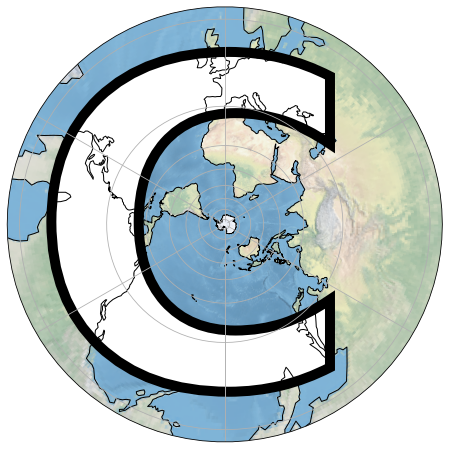

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.textpath
import matplotlib.patches
from matplotlib.font_manager import FontProperties


fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

ax.coastlines()
ax.gridlines()
ax.stock_img()

# Generate a matplotlib path representing the character "C".
fp = FontProperties(family='DejaVu Sans', weight='bold')
logo_path = matplotlib.textpath.TextPath((-4.5e7, -3.7e7),
                                         'C', size=103250000, prop=fp)

# Add the path as a patch, drawing black outlines around the text.
patch = matplotlib.patches.PathPatch(logo_path, facecolor='white',
                                     edgecolor='black', linewidth=10,
                                     transform=ccrs.SouthPolarStereo())
ax.add_patch(patch)
plt.show()

<a id="sect-grid"></a>
## Gridlines and Tick Labels
The Gridliner instance, often created by calling the `cartopy.mpl.geoaxes.GeoAxes.gridlines()` method on a `cartopy.mpl.geoaxes.GeoAxes` instance, has a variety of attributes which can be used to determine draw time behaviour of the gridlines and labels.

In this first example, gridlines and tick labels are plotted in a non-rectangular projection, with mostly default values:

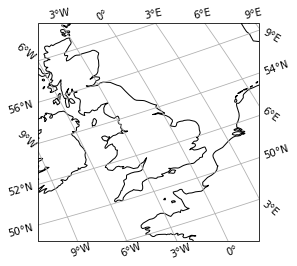

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

rotated_crs = ccrs.RotatedPole(pole_longitude=120.0, pole_latitude=70.0)

ax = plt.axes(projection=rotated_crs)
ax.set_extent([-6, 3, 48, 58], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()

A more complicated example below makes use of many of the features of the Gridliner class to produce customized gridlines and tick labels:

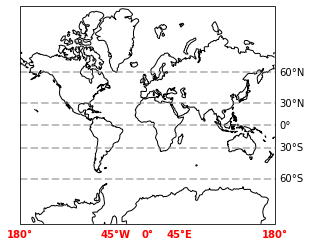

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)


ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.show()

The following examples demonstrate how to add longitude and latitude gridlines and tick labels on a non-rectangular projection.

In the first example, longitude labels may be drawn on left and right sides, and latitude labels may be drawn on bottom and top sides. Thanks to the dms keyword, minutes are used when appropriate to display fractions of degree.

In the second example, labels are still drawn at the map edges despite its complexity, and some others are also drawn within the map boundary.

In the third example, labels are drawn only on the left and bottom sides.

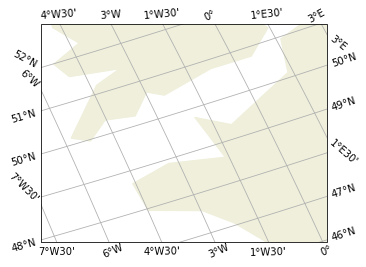

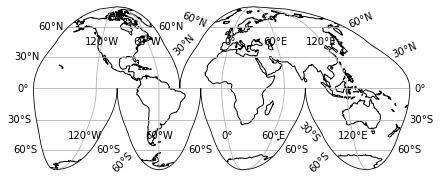

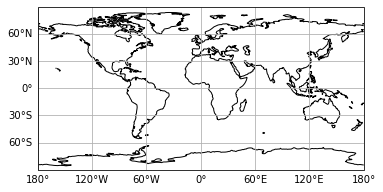

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


rotated_crs = ccrs.RotatedPole(pole_longitude=120.0, pole_latitude=70.0)
ax0 = plt.axes(projection=rotated_crs)
ax0.set_extent([-6, 1, 47.5, 51.5], crs=ccrs.PlateCarree())
ax0.add_feature(cfeature.LAND.with_scale('110m'))
ax0.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.figure(figsize=(6.9228, 3))
ax1 = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax1.coastlines(resolution='110m')
ax1.gridlines(draw_labels=True)

plt.figure(figsize=(7, 3))
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.coastlines(resolution='110m')
gl = ax2.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

This example demonstrates adding tick labels to maps on rectangular projections using special tick formatters.

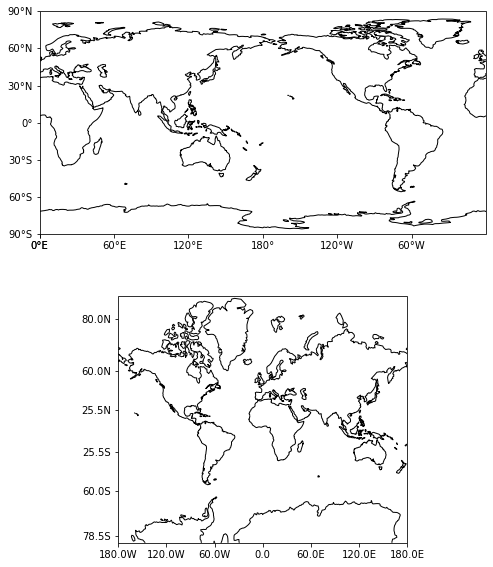

In [16]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 10))

# Label axes of a Plate Carree projection with a central longitude of 180:
ax1 = fig.add_subplot(2, 1, 1,
                      projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_global()
ax1.coastlines()
ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Label axes of a Mercator projection without degree symbols in the labels
# and formatting labels to include 1 decimal place:
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.Mercator())
ax2.set_global()
ax2.coastlines()
ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax2.set_yticks([-78.5, -60, -25.5, 25.5, 60, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.1f',
                                   degree_symbol='',
                                   dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f',
                                  degree_symbol='')
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)

plt.show()

<a id="sect-cust"></a>
## Custom Boundary Shape
This example demonstrates how a custom shape geometry may be used instead of the projection’s default boundary.

In this instance, we define the boundary as a circle in axes coordinates. This means that no matter the extent of the map itself, the boundary will always be a circle.

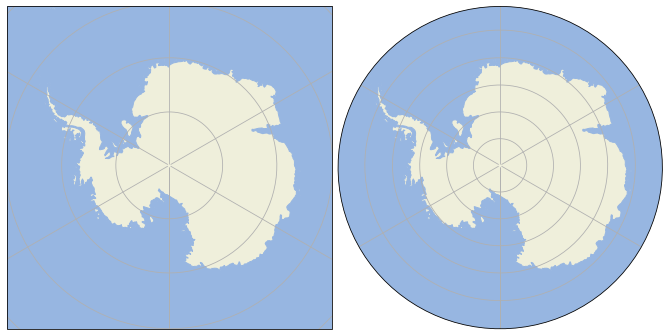

In [17]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                      sharex=ax1, sharey=ax1)
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

ax1.gridlines()
ax2.gridlines()

ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)

# Compute a circle in axes coordinates, which we can use as a boundary for the map. 
# We can pan/zoom as much as we like - the boundary will be permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax2.set_boundary(circle, transform=ax2.transAxes)

plt.show()

<a id="sect-data"></a>
## Plotting Data
Once you have the map just the way you want it, data can be added to it in exactly the same way as with normal Matplotlib axes. By default, the coordinate system of any data added to a GeoAxes is the same as the coordinate system of the GeoAxes itself, to control which coordinate system that the given data is in, you can add the transform keyword with an appropriate `cartopy.crs.CRS` instance:

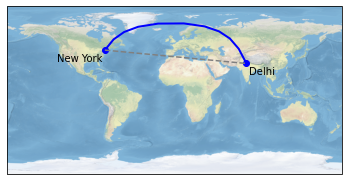

In [18]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

Notice how the line in blue between New York and Delhi is not straight on a flat PlateCarree map, this is because the Geodetic coordinate system is a truly spherical coordinate system, where a line between two points is defined as the shortest path between those points on the globe rather than 2d Cartesian space.

By default, Matplotlib automatically sets the limits of your Axes based on the data that you plot. Because cartopy implements a GeoAxes class, this equates to the limits of the resulting map. Sometimes this autoscaling is a desirable feature and other times it is not.

To set the extents of a cartopy GeoAxes, there are several convenient options:
- For “global” plots, use the set_global() method.
- To set the extents of the map based on a bounding box, in any coordinate system, use the set_extent() method.
- Alternatively, the standard limit setting methods can be used in the GeoAxes’s native coordinate system (e.g. set_xlim() and set_ylim()).

<a id="sect-contour"></a>
## Contour Plots
Creates a contour plot.

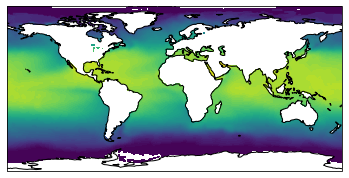

In [19]:
import os
import matplotlib.pyplot as plt
from scipy.io import netcdf
from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf.netcdf_file(fname, maskandscale=True, mmap=False)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

An example of adding contour labels to matplotlib contours. Also, see the example at [this site](https://scitools.org.uk/cartopy/docs/latest/gallery/scalar_data/contour_labels.html#sphx-glr-gallery-scalar-data-contour-labels-py).

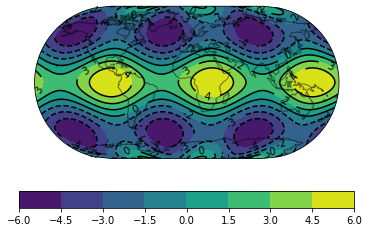

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
#from waves import sample_data
import numpy as np


fig = plt.figure()

# Setup a global EckertIII map with faint coastlines.
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
ax.set_global()

# Setup the data
lats = np.linspace(-90, 90, 180)
lons = np.linspace(-180, 180, 180)
lon2d, lat2d = np.meshgrid(lons, lats)

sst = 4 * np.cos(np.deg2rad(lat2d) * 3) + 2 * np.sin(np.deg2rad(lon2d) * 3)

# Add colourful filled contours.
filled_c = ax.contourf(lons, lats, sst, transform=ccrs.PlateCarree())

# And black line contours.
line_c = ax.contour(lons, lats, sst, levels=filled_c.levels, colors=['black'], transform=ccrs.PlateCarree())

# Uncomment to make the line contours invisible.
# plt.setp(line_c.collections, visible=False)

# Add a colorbar for the filled contour.
fig.colorbar(filled_c, orientation='horizontal')

# Use the line contours to place contour labels.
ax.clabel(
    line_c,  # Typically best results when labelling line contours.
    colors=['black'],
    manual=False,  # Automatic placement vs manual placement.
    inline=True,  # Cut the line where the label will be placed.
    fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
)

ax.coastlines('110m', alpha=0.5)

plt.show()

<a id="sect-img"></a>
## Images

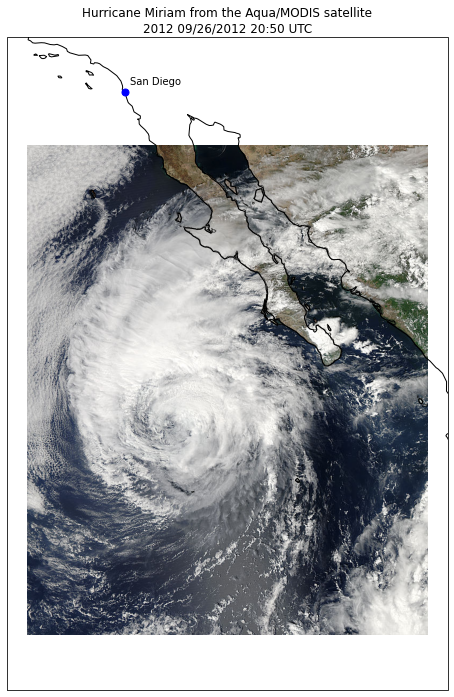

In [21]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

ax.use_sticky_edges = False
# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

plt.show()

## Review Question

Create a plot with the following specifications:
- Shows most of or the entire world
- Has the following features: land, ocean, coastlines, and  country borders. 
- The land and ocean should be coloured appropriately.
- Plot the word "Ottawa" at 45.4, -75.7.
- Add a title (be creative).

Use your preferred map projection and be careful with the transform!